In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

#### [실습] 기본그래프 그리기

1. df_tsb 데이터에서 호선별로 승차 이용객수의 평균을 막대그래프로 출력
2. df_tsb 데이터에서 '2022-06-01'~'2022-06-30' 날짜 사이의 이용객수를 합계하여 선그래프로 출력 (x축 : 날짜, y축 이용객수합계)
3. df_subway 데이터에서 승차총승객수와 하차총승객수에 대한 산점도 그래프를 그리고 노선명별로 색상을 다르게 표현

In [15]:
import pandas as pd
df_tsb = pd.read_csv('data/서울교통공사_역별일별승하차인원정보_20220731.csv')
df_tsb.head()

,날짜,호선,역번호,역명,구분,이용객수
0,2022-01-01,1,150,서울역,승차,18525
1,2022-01-01,1,150,서울역,하차,17087
2,2022-01-01,1,151,시청,승차,5660
3,2022-01-01,1,151,시청,하차,5063
4,2022-01-01,1,152,종각,승차,10046


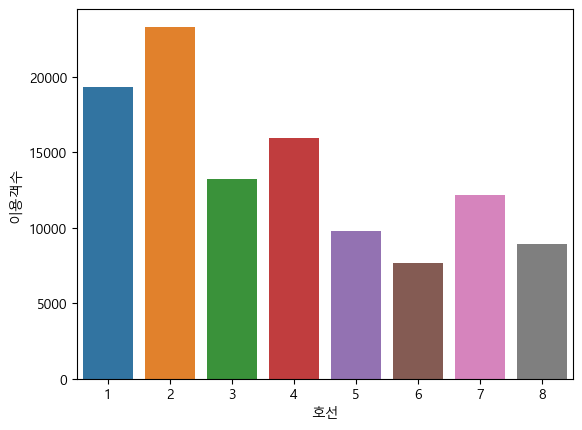

In [16]:
c = df_tsb['구분'] == '승차'
df_sub = df_tsb[c]
df_grp = df_sub.groupby('호선')[['이용객수']].mean()

sns.barplot(data = df_grp, x = df_grp.index, y ='이용객수')
plt.show()

In [17]:
c = (df_tsb['날짜'] >= '2022-06-01') & (df_tsb['날짜'] <= '2022-06-30')
df_sub = df_tsb[c]
df_grp = df_sub.groupby('날짜', as_index=False)['이용객수'].sum()
df_grp

,날짜,이용객수
0,2022-06-01,5461111
1,2022-06-02,9294514
2,2022-06-03,9472957
3,2022-06-04,6504110
4,2022-06-05,4816845
5,2022-06-06,4534664
6,2022-06-07,9230210
7,2022-06-08,9347009
8,2022-06-09,9277595
9,2022-06-10,9630403


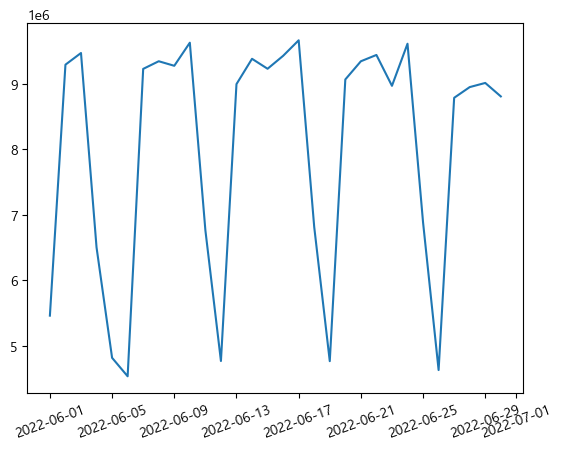

In [21]:
x = df_grp['날짜'].astype('datetime64')
y = df_grp['이용객수']
plt.plot(x, y)
plt.xticks(rotation=20)
plt.show()

In [36]:
df_subway = pd.read_csv('./data/CARD_SUBWAY_MONTH_202107.csv', encoding='CP949')
df_subway.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210701,중앙선,상봉(시외버스터미널),6102,6098,20210704
1,20210701,중앙선,망우,7706,7633,20210704
2,20210701,중앙선,양원,1987,2052,20210704
3,20210701,중앙선,구리,13576,13748,20210704
4,20210701,중앙선,도농,10145,9146,20210704


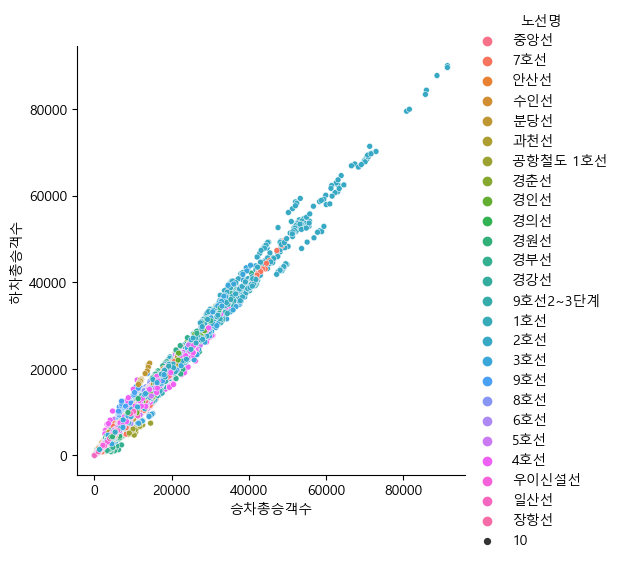

In [39]:
sns.relplot(kind='scatter', data=df_subway, x='승차총승객수', y='하차총승객수', size=10, hue='노선명')
plt.show()

#### [심화] 
1. df_nf에서 국가별 'imdb_score'의 평균을 'imdb_votes'의 총합을 나타내는 데이터프레임 생성. 이때 국가는 production_countries에서 가장 먼저 나타나는 국가로 수정하여 그룹화 합니다.
2. 1번의 결과에서 imdb_votes의 총합이 높은 순으로 10개의 국가를 인덱싱 하여 데이터프레임 생성
3. 2번의 결과로 부터 imdb_score의 평균이 높은 순으로 정렬된 막대그래프 생성(수직 수평 상관없음)
4. 3번 결과에서 상위 5개의 국가에 대해 2010년부터 년도별 평균imdb_score의 선그래프 생성(5개의 선그래프)
5. 2번 결과에서 평균imdb_score가 x축, 합게 imdb_votes의 log값이 y축 이고 국가별 색상이 다른 산점도 그래프 생성. log변환은 np.log() 함수 이용 인자로 시리즈 입력가능

In [46]:
import pandas as pd
df_nf = pd.read_csv('./data/titles.csv')
df_nf

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000


In [47]:
def country(x):
    x = x.replace('[','')
    x = x.replace(']','')
    x = x.replace("'",'')
    wl = x.split(',')
    return wl[0]

df_nf['country'] = df_nf['production_countries'].apply(country)
nf_gp = df_nf.groupby('country')[['imdb_votes']].sum()
nf_gp['imdb_score'] = df_nf.groupby('country')['imdb_score'].mean()
nf_sort = nf_gp.sort_values('imdb_votes', ascending = False)
top_10 = nf_sort.iloc[:10]
top_10

,imdb_votes,imdb_score
country,,
US,84976662.0,6.542599
GB,11566239.0,6.872727
IN,6528025.0,6.413126
CA,3517425.0,6.368750
DE,3150700.0,6.389535
JP,2674288.0,7.024597
FR,1930921.0,6.382609
ES,1587099.0,6.347093
KR,1369245.0,7.237113


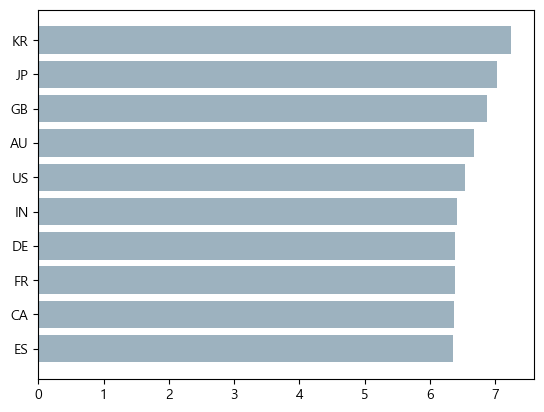

In [48]:
top_10 = top_10.sort_values('imdb_score', ascending = True)
plt.barh(top_10.index,top_10['imdb_score'], color = '#9DB2BF')
plt.show()

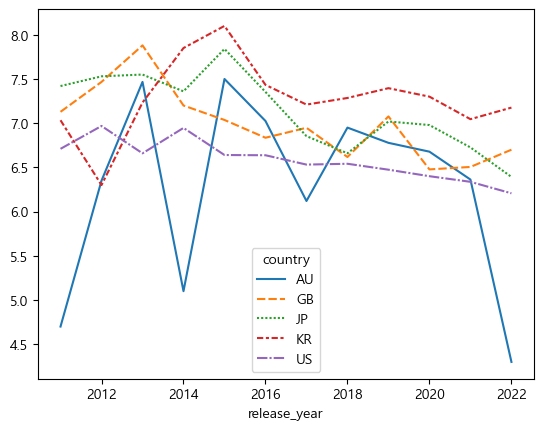

In [49]:
top5 = df_nf[df_nf['country'].isin(['KR', 'JP', 'GB', 'AU', 'US'])]
top5 = top5[top5['release_year'] > 2010]
pivot = pd.pivot_table(top5, index = 'release_year', columns = 'country', values = 'imdb_score', aggfunc = 'mean')
sns.lineplot(data = pivot)
plt.show()

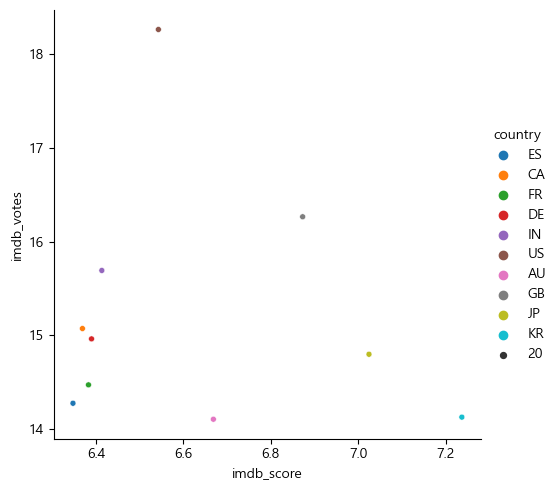

In [51]:
import numpy as np

sns.relplot(kind='scatter', data=top_10, x='imdb_score', y=np.log(top_10['imdb_votes']), size=20, hue=top_10.index)
plt.show()


<br>

#### [실습] 한 수치형 변수에 대한 요약과 시각화

2. df_sp에서 'math score'의 히스토그램을 matplotlib으로 그려기

3. df_sp에서 'math score'의 히스토그램을 seaborn으로 그려기



In [40]:
df_sp = pd.read_csv('./data/StudentsPerformance.csv')
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


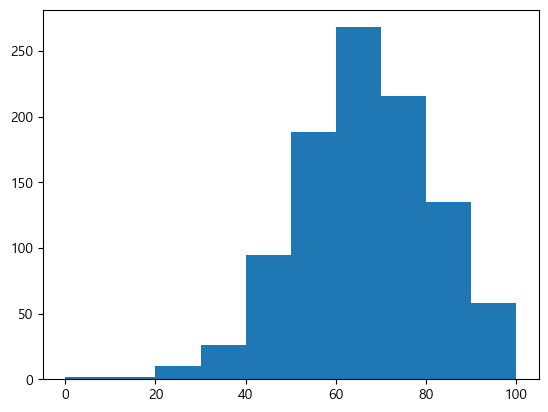

In [41]:
plt.hist(df_sp['math score'])
plt.show()

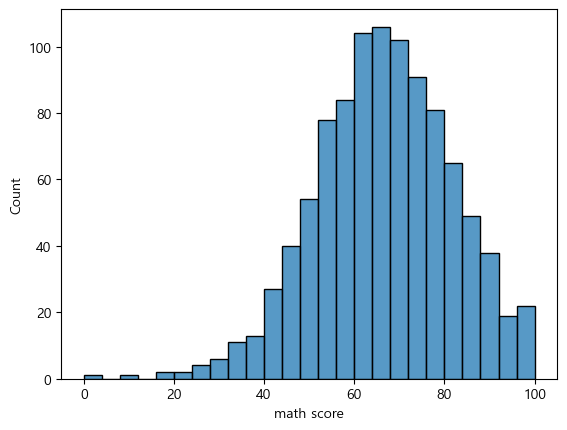

In [42]:
sns.histplot(data=df_sp,
             x='math score')
plt.show()

#### [실습] 두 범주형 변수의 관계 탐색

1. df_sp에서 'race/ethnicity'와 'parental level of education'의 교차표 만들고 히트맵으로 출력 
2. 1.의 교차표를 인덱스에 대한 백분율로 바꿔서 히트맵 출력
5. df_sp에서 'race/ethnicity'와 'parental level of education'에대한 'math score'의 평균을 나타내는 피벗테이블 생성후 히트맵으로 출력 

In [4]:
df_sp = pd.read_csv('./data/StudentsPerformance.csv')
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot: xlabel='parental level of education', ylabel='race/ethnicity'>

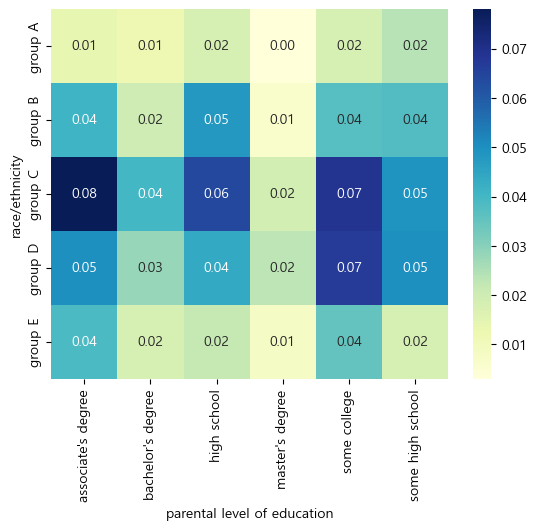

In [5]:
ctab = pd.crosstab(df_sp['race/ethnicity'], df_sp['parental level of education'], normalize='all')
sns.heatmap(ctab, cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

<AxesSubplot: xlabel='parental level of education', ylabel='race/ethnicity'>

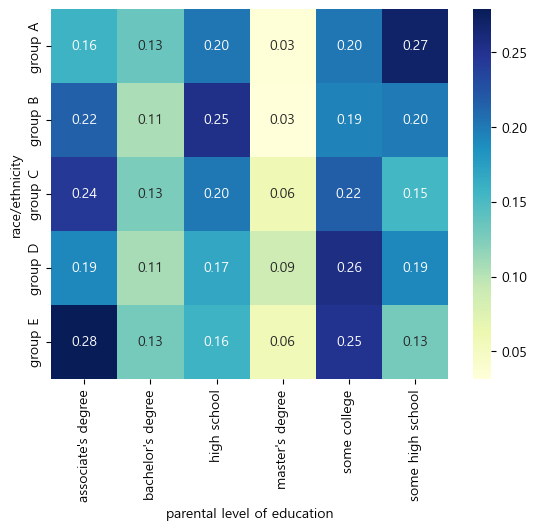

In [6]:
ctab = pd.crosstab(df_sp['race/ethnicity'], df_sp['parental level of education'], normalize='index')
sns.heatmap(ctab, cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

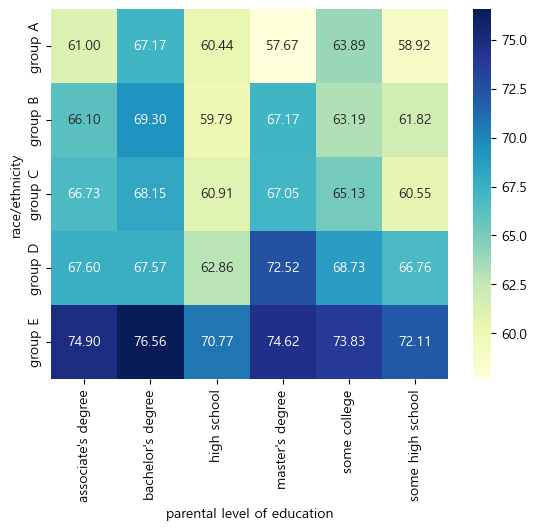

In [46]:
import numpy as np
pivot = pd.pivot_table(df_sp, index='race/ethnicity', columns='parental level of education', 
                       values='math score', aggfunc=np.mean)
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

<br>


#### [실습]

1. df_sp에서 'reading score'의 Q1(25%), 중위수(median, 50%), Q3(75%) 계산하기
2. df_sp에서 'math score'와 'reading score'의 상자그림을 하나의 표안에 그리기 (matplotlib)
2. df_sp에서 'race/ethnicity'별 'math score'의 상자그림 하나의 표안에 그리기 (seaborn)



In [47]:
df_sp = pd.read_csv('./data/StudentsPerformance.csv')
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [48]:
q1 = df_sp['reading score'].quantile(0.25)
median = df_sp['reading score'].quantile(0.50)
q3 = df_sp['reading score'].quantile(0.75)
print(q1, median, q3)

59.0 70.0 79.0


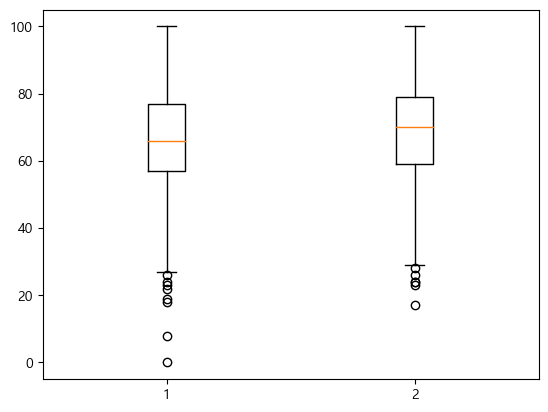

In [49]:
plt.boxplot(df_sp[['math score','reading score']])
plt.show()

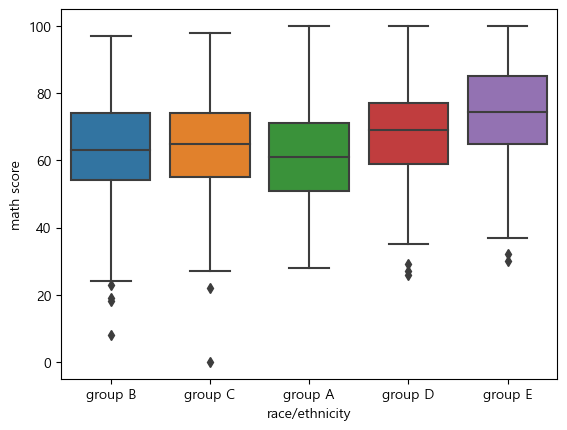

In [50]:
sns.boxplot(data=df_sp,
            x='race/ethnicity', 
            y='math score')
plt.show()